# バイアス付きのデータを作成する

In [15]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 

In [16]:
# dataset
dataset_name = "human"
# dataset_name = "celegans"

In [17]:
df = pd.read_csv("../../data/maked/default/" + dataset_name + ".csv", header=0)
df.head()

,compound,protein,label
0,CC[C@@]1(C[C@@H]2C3=CC(=C(C=C3CCN2C[C@H]1CC(C)...,MSPLNQSAEGLPQEASNRSLNATETSEAWDPRTLQALKISLAVVLS...,0
1,C1COCCO1,MSTSSLRRQMKNIVHNYSEAEIKVREATSNDPWGPSSSLMSEIADL...,1
2,CCCC(=O)C1=CN=CC=C1,MAGAGPKRRALAAPAAEEKEEAREKMLAAKSADGSAPAGEGEGVTL...,0
3,CCN[C@H]1CN(S(=O)(=O)C2=C1C=C(S2)S(=O)(=O)N)CCCOC,MVVMNSLRVILQASPGKLLWRKFQIPRFMPARPCSLYTCTYKTRNR...,1
4,C[C@H](C[C@@H](C(=O)O)N)C(=O)O,MKLKLKNVFLAYFLVSIAGLLYALVQLGQPCDCLPPLRAAAEQLRQ...,0


In [18]:
df = df.sample(frac=1, random_state=0)
df

,compound,protein,label
4120,C1=CC2=C3C(=C1)C=CC4=C3C(=CC5=C4[C@H]6[C@H](O6...,MAGYLRVVRSLCRASGSRPAWAPAALTAPTSQEQPRRHYADKRIKV...,0
6726,CCCCCCCCCCCCCCCC(=O)OCC(CO)OC(=O)CCCCCCC/C=C\C...,MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDA...,0
5258,C1=CC(=C(C(=C1)Cl)CC(=O)N=C(N)N)Cl,MATARTFGPEREAEPAKEARVVGSELVDTYTVYIIQVTDGSHEWTV...,1
2266,C1CN(CCC1C(=O)N2CCN(CC2)S(=O)(=O)C3=CC4=C(C=C3...,MATAGNPWGWFLGYLILGVAGSLVSGSCSQIINGEDCSPHSQPWQA...,1
3181,C(C(CO)O)O,MPAELLLLLIVAFASPSCQVLSSLRMAAILDDQTVCGRGERLALAL...,1
...,...,...,...
4931,C1CN(C[C@H](N1)C(=O)NCCCS)CC2=CC=C(C=C2)F,MAQALPWLLLWMGAGVLPAHGTQHGIRLPLRSGLGGAPLGLRLPRE...,1
3264,C1=C[C@@H]([C@H]([C@@H]1N2C=NC3=C2N=CN=C3N)O)O,MSDKLPYKVADIGLAAWGRKALDIAENEMPGLMRMRERYSASKPLK...,1
1653,C(C(CO)O)O,MPFPVTTQGPPQPAPPPNRYGVSSPISLAVPKETDCLLTQRLIETL...,1
2607,CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1


In [19]:
N = len(df)
train_len = int(N * 0.1)

In [20]:
df_test = df[:train_len]
df = df[train_len:]

## SMILES形式のデータから分子量を計算する

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

In [22]:
df["molecular_weight"] = df["compound"].map(lambda sm: rdMolDescriptors._CalcMolWt(Chem.MolFromSmiles(sm)))
df.head()

RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:12] WARNING: not removing hydrogen atom without neighbors
[17:35:12] WARNING: not removing hydrogen atom wit

,compound,protein,label,molecular_weight
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094
4532,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGS...,1,785.557
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394


In [23]:
df["weight_norm"] = (df["molecular_weight"] - df["molecular_weight"].mean()) / df["molecular_weight"].std()
df.head()

/tmp/ipykernel_3547686/589347445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weight_norm"] = (df["molecular_weight"] - df["molecular_weight"].mean()) / df["molecular_weight"].std()


,compound,protein,label,molecular_weight,weight_norm
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390,-0.963145
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136,-0.911125
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094,-0.854159
4532,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGS...,1,785.557,1.976033
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394,0.599989


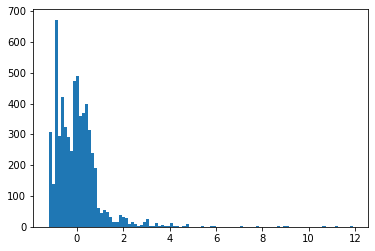

In [24]:
plt.hist(df["weight_norm"].values, bins=100)
plt.show()

In [25]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(x))

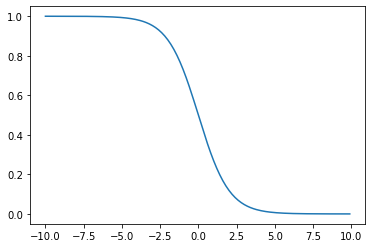

In [26]:
x = np.arange(-10, 10, 0.1)
y = list(map(sigmoid, x))
plt.plot(x,y)
plt.show()

In [27]:
df["prob"] = df["weight_norm"].map(sigmoid)
df.head()

/tmp/ipykernel_3547686/1989018038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prob"] = df["weight_norm"].map(sigmoid)


,compound,protein,label,molecular_weight,weight_norm,prob
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390,-0.963145,0.723751
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136,-0.911125,0.713230
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094,-0.854159,0.701439
4532,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGS...,1,785.557,1.976033,0.121742
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394,0.599989,0.354346


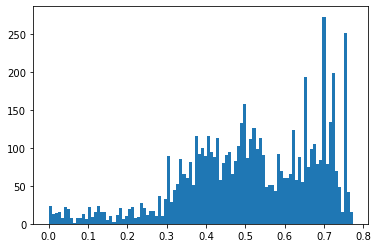

In [28]:
plt.hist(df["prob"].values, bins=100)
plt.show()

In [29]:
import random

In [30]:
def observed(x):
    coin = random.random()
    if x > coin:
        return 1
    else:
        return 0

In [31]:
df["observed"] = df["prob"].map(observed)
df.head()

/tmp/ipykernel_3547686/368356247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["observed"] = df["prob"].map(observed)


,compound,protein,label,molecular_weight,weight_norm,prob,observed
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390,-0.963145,0.723751,1
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136,-0.911125,0.713230,1
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094,-0.854159,0.701439,1
4532,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGS...,1,785.557,1.976033,0.121742,0
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394,0.599989,0.354346,1


In [32]:
df_observed = df[df["observed"] == 1]
df_observed.head()

,compound,protein,label,molecular_weight,weight_norm,prob,observed
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390,-0.963145,0.723751,1
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136,-0.911125,0.713230,1
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094,-0.854159,0.701439,1
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394,0.599989,0.354346,1
1715,C1CC2CNC(CC2CC1CP(=O)(O)O)C(=O)O,MRMLLALLALSAARPSASAESHWCYEVQAESSNYPCLVPVKWGGNC...,0,277.257,-0.098463,0.524596,1


In [33]:
len(df_observed)

3262

In [34]:
count_compound = df_observed["compound"].value_counts().to_dict()
def calc_weight(x):
    weight = 1 / count_compound[x]
    weight = max( weight, 0.1)
    weight = min( weight, 0.9)
    return weight

In [35]:
df_observed["weight"] = df_observed["compound"].map(calc_weight)
df_observed.head()

/tmp/ipykernel_3547686/1975894560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_observed["weight"] = df_observed["compound"].map(calc_weight)


,compound,protein,label,molecular_weight,weight_norm,prob,observed,weight
5153,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,65.390,-0.963145,0.723751,1,0.100000
4296,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,78.136,-0.911125,0.713230,1,0.100000
220,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,92.094,-0.854159,0.701439,1,0.100000
247,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,448.394,0.599989,0.354346,1,0.333333
1715,C1CC2CNC(CC2CC1CP(=O)(O)O)C(=O)O,MRMLLALLALSAARPSASAESHWCYEVQAESSNYPCLVPVKWGGNC...,0,277.257,-0.098463,0.524596,1,0.900000


In [36]:
# df_observed[["compound", "protein", "label", "weight"]].to_csv("../../data/maked/bias/train_" + dataset_name + ".csv", index=None)
# df_test.to_csv("../../data/maked/bias/test_" + dataset_name + ".csv", index=None)

In [37]:
def counting(x):
    return count_compound[x]

In [38]:
df_compound = pd.DataFrame(df_observed["compound"].unique(), columns=["compound"])
df_compound.head()

,compound
0,[Zn]
1,C(CS)O
2,C(C(CO)O)O
3,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...
4,C1CC2CNC(CC2CC1CP(=O)(O)O)C(=O)O


In [39]:
df_compound["link"] = df_compound["compound"].map(counting)
df_compound["molecular_weight"] = df_compound["compound"].map(lambda sm: rdMolDescriptors._CalcMolWt(Chem.MolFromSmiles(sm)))

df_compound.head()

RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
[17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:35:14] WARNING: not removing hy

,compound,link,molecular_weight
0,[Zn],145,65.390
1,C(CS)O,20,78.136
2,C(C(CO)O)O,173,92.094
3,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,3,448.394
4,C1CC2CNC(CC2CC1CP(=O)(O)O)C(=O)O,1,277.257


In [40]:
li = []
for i in range(50):
    if i < 49:
        df_new = df_compound[(df_compound["molecular_weight"] < (i+1) * 20) & (i * 20 <= df_compound["molecular_weight"])]
    else:
        df_new = df_compound[(i * 20 <= df_compound["molecular_weight"])]
    if 0 == len(df_new["link"].values):
        m = 0
    else:
        m = np.sum(df_new["link"].values)
    li.append(m)

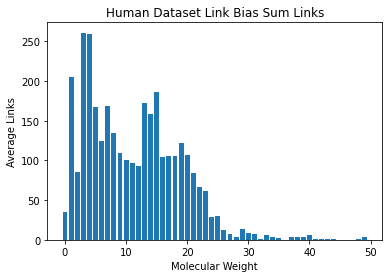

In [41]:
fig, ax = plt.subplots()
# Axesに棒グラフを追加
ax.bar(range(len(li)), li)
fig.patch.set_facecolor('white')
ax.set_xlabel("Molecular Weight")
ax.set_ylabel("Average Links")
ax.set_title("Human Dataset Link Bias Sum Links")
plt.show()
fig.savefig("link_bias_sum_link.png")